<font size="8"><b>Investment Analysis Assignment</b></font> 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Checkpoint 1: Data Cleaning

1. Load the companies and rounds data (provided on the previous page) into two data frames and name them <b>companies </b> and <b>rounds2</b> respectively.
2. Table 1.1: The table below is just for reference — you need to fill out the spreadsheet which is attached in the download section. This holds true for all the tables.
 

<b>Results Expected: Table 1.1</b>

> Table 1.1: Understand the Data Set   

<table style="width:90%"; border="1";>
<tr>
<td>How many unique companies are present in rounds2?</td>
<td>66368</td>
</tr>
    
<tr>
<td>How many unique companies are present in companies?</td>
<td>66368</td>
</tr>

<tr>
<td>In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.</td>
<td>permalink</td>
</tr>
    
<tr>
<td>Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N</td>
<td>No</td>
</tr>

<tr>
<td>Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?</td>
<td>114949</td>
</tr>

</table>


After this, you will need to work only with the <b>master frame.</b>

In [3]:
#Creating Companies dataframe
companies=pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/d934844e-5182-4b58-b896-4ba2a499aa57/companies.txt",
                      sep="\t", encoding="ISO-8859-1")

#Removing the special characters in Permalink and name column.
companies["permalink"] = companies["permalink"].str.encode('ascii','ignore').str.decode('ascii').str.lower()

In [4]:
#Analysing the data
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
#Creating rounds2 dataframe
rounds2=pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/4c3b5ed0-e5dc-4838-89a2-173d8707d857/rounds2.csv", 
                    engine= "python", encoding="ISO-8859-1")
rounds2["company_permalink"]=rounds2["company_permalink"].str.encode('ascii','ignore').str.decode('ascii').str.lower()

In [7]:
#Analysing the data
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [8]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
# Converting the columns ( company_permalink in round2 and permalink & name in companies) to lowercase to
# avoid duplicacy due to different case
rounds2['company_permalink'] = rounds2["company_permalink"].str.encode('ascii','ignore').str.decode('ascii').str.lower()
companies['permalink']=companies["permalink"].str.encode('ascii','ignore').str.decode('ascii').str.lower()

In [10]:
#Unique records in rounds dataframe
rounds2["company_permalink"].nunique(dropna=True)

66368

* Question. How many unique companies are present in rounds2?
- Answer: 66368

In [11]:
#Unique records in companies dataframe
companies["permalink"].nunique(dropna=True)

66368

* Question. How many unique companies are present in Companies?
- Answer: 66368

* Question. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
- Answer: permalink

In [12]:
#To check if company available in Companies dataframe is not avilable in rounds2 dataframe
companies.loc[~rounds2.company_permalink.isin(companies.permalink)]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


* Question. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
- Answer: No

In [13]:
#Merge companies and rounds2 dataframes to a new dataframe named "master_frame"
master_frame=pd.merge(companies, rounds2, left_on='permalink', right_on='company_permalink', how='inner')

In [14]:
#Check the shape of master_frame DF
master_frame.shape

(114949, 16)

In [15]:
#Check the number of null values in each column of master_frame DF
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [16]:
#Check the percentage of null values in each columns of master_frame DF
pd.options.display.float_format = '{:.2f}'.format
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
dtype: float64

In [17]:
#Check the shape of master_frame DF
master_frame.shape

(114949, 16)

* <b> Questions. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame? </b>
- Answer : There are 114949 rows, 16 columns. We also checked if there are any null values and found 'funding round code' columns with maximum null entries with 72.91% null values. Also the companies with status closed are plenty. We will be not be removing those cases as there is no such instructions in the assigment provided.

In [18]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.00
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.00


# Checkpoint 2: Funding Type Analysis

This is the first of the three goals of data analysis – investment type analysis.

 

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

*  Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
*  Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 

Spark Funds wants to choose one of these four investment types for each potential investment they will make.

 

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

* Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

* Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

<table style="width:100%">
<tr>
<th>SI.No</th>
<th>Questions</th>
<th>Answer</th>
</tr>

<tr>
<td>1</td>
<td>Average funding amount of venture type</td>
<td>11748949.13</td>
</tr>

<tr>
<td>2</td>
<td>Average funding amount of angel type</td>
<td>958694.47</td>
</tr>

<tr>
<td>3</td>
<td>Average funding amount of seed type</td>
<td>719818.00</td>
</tr>

<tr>
<td>4</td>
<td>Average funding amount of private equity type</td>
<td>73308593.03</td>
</tr>

<tr>
<td>5</td>
<td>Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?</td>
<td>venture</td>
</tr>
</table>
 

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

* Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

In [19]:
#Calculating Average investment in Venture,Angel,Seed and Private Equity
pd.options.display.float_format = '{:.2f}'.format
funding_type_avg = master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean()[['venture','angel','seed','private_equity']].sort_values() 
funding_type_avg

funding_round_type
seed               719818.00
angel              958694.47
venture          11748949.13
private_equity   73308593.03
Name: raised_amount_usd, dtype: float64

In [20]:
#Finding Best Venture type suitable for spark fund i.e 5 to 15 million USD
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000,inclusive=True)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_usd, dtype: bool

<font size="3"><b> As it can be observed, the best investment type is Venture Type, we will proceed ahead with that only for further analysis</b></font>

Answers to Questions:
1. Average funding amount of venture type 
    <font size="5">11748949.12949</font>
2. Average funding amount of angel type
    <font size="5">958694.46975</font>
3. Average funding amount of seed type
     <font size="5">719817.99691</font>
4. Average funding amount of private equity type
     <font size="5">73308593.02944</font>
5. Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? 
     <font size="5">venture</font>

# Checkpoint 3: Country Analysis

This is the second goal of analysis — <b>country analysis</b>.

 

Now that you know the type of investment suited for Spark Funds, let's narrow down the countries.

 

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where <b> most investments are occurring</b>.

 

1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named <b>top9</b> with the top nine countries (based on the total investment amount each country has received)

 

<b>Identify the top three English-speaking countries in the data frame top9.</b>

<b>Results Expected: All codes for data frame top9.</b>

* Question : For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

<b>Results Expected: Table 3.1</b>

> Table 3.1: Understand the Top9 and Wiki Link WebScraping Data Set   

<table style="width:90%"; border="1";>
<tr>
<td>Top English speaking country</td>
<td>USA</td>
</tr>
    
<tr>
<td>Second English speaking country</td>
<td>GBR</td>
</tr>

<tr>
<td>Third English speaking country</td>
<td>IND</td>
</tr>

</table>

In [21]:
#Creating master frame for venture type only for further analysis
master_frame_venture = master_frame[master_frame.funding_round_type == "venture"]
master_frame_venture

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00


In [22]:
master_frame_venture.shape

(55494, 16)

In [23]:
#creating a data frame named top9 with the top nine countries 
top9 = master_frame_venture.groupby('country_code',as_index=False)['raised_amount_usd'].sum().sort_values(by = ['raised_amount_usd'],ascending=False).head(9)
top9['Rank'] = range(1,10)
top9.set_index(['Rank'],inplace = True)

In [24]:
top9

,country_code,raised_amount_usd
Rank,,
1,USA,422510842796.00
2,CHN,39835418773.00
3,GBR,20245627416.00
4,IND,14391858718.00
5,CAN,9583332317.00
6,FRA,7259536732.00
7,ISR,6907514579.00
8,DEU,6346959822.00
9,JPN,3363676611.00


In [25]:
#Reading Tables from wiki link provided and fetching only English Speaking countries List
country_official_lang=pd.read_html("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language",header=0)
Country_tab1=country_official_lang[0][["Country","Alpha-3 code"]]
Country_tab2=country_official_lang[1][["Country","Alpha-3 code"]]
country_tab12=[Country_tab1,Country_tab2]
Country_list_from_wiki=pd.concat(country_tab12).sort_values('Alpha-3 code')
Country_list_from_wiki

,Country,Alpha-3 code
0,Antigua and Barbuda[2],ATG
0,Australia,AUS
5,Burundi[5],BDI
1,Bahamas[2],BHS
3,Belize[4],BLZ
2,Barbados[3],BRB
4,Botswana[4],BWA
7,Canada[2],CAN
6,Cameroon[2],CMR
8,Cook Islands[2]14,COK


In [26]:
#Derving top3 countries by joining top9 and Country_list_from_wiki dataframes
pd.options.display.float_format = '{:.2f}'.format
top_3=pd.merge(left=top9, right=Country_list_from_wiki, left_on='country_code',right_on='Alpha-3 code',how='inner').head(3)
top_3[['Alpha-3 code','raised_amount_usd']]

,Alpha-3 code,raised_amount_usd
0,USA,422510842796.00
1,GBR,20245627416.00
2,IND,14391858718.00


In [27]:
#Creating a list to use it later on rather than hard coding country codes
top_3['Alpha-3 code'].tolist()

['USA', 'GBR', 'IND']

<b> Answers to the questions:</b>
1. Top English speaking country = USA
2. Second English speaking country = GBR
3. Third English speaking country = IND 

In [28]:
#Check top 9 frame should have 9 unique countries
len(top9.country_code.unique())

9

In [29]:
#Check the shape of master_frame_venture DF
master_frame_venture.shape

(55494, 16)

# Checkpoint 4: Sector Analysis 1

This is the third goal of analysis — sector analysis.

 

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

 

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

 

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

1. Extract the primary sector of each category list from the category_list column

2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

<b>Expected Results:</b> Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

In [30]:
#Adding new column Primary_Sector to the master_frame_venture dataframe
#Picking only first value in case if category list have multiple values seprated with piple(|)
master_frame_venture=master_frame_venture[master_frame_venture.country_code.isin(top_3['Alpha-3 code'].tolist())]
master_frame_venture['Primary_Sector']=master_frame_venture.category_list.str.split('|').str[0].str.lower()

In [31]:
#Getting the shape of dataframe
master_frame_venture.shape

(41667, 17)

In [32]:
#Creating mapping dataframe and mapping each primary sector to one of the eight main sectors
mapping=pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/231dc91c-0642-470d-a362-29ddcd7142ce/mapping.csv')
mapping['category_list']= mapping['category_list'].replace({'0':'na','2.na':'2.0'}, regex=True).str.lower()
melted=pd.melt(mapping, id_vars=["category_list"], var_name="Main_Sector",value_name="flag")
mapping_tag=melted[melted["flag"] == 1][['category_list','Main_Sector']]
mapping_tag

,category_list,Main_Sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports
57,bicycles,Automotive & Sports
69,boating industry,Automotive & Sports
87,cad,Automotive & Sports
93,cars,Automotive & Sports
188,design,Automotive & Sports


In [33]:
#Check the columns available in dataframe
master_frame_venture.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd',
       'Primary_Sector'],
      dtype='object')

In [34]:
Main_Sector_Venture=pd.merge(master_frame_venture,mapping_tag,left_on='Primary_Sector',right_on='category_list',how='inner')
Main_Sector_Venture

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_Sector,category_list_y,Main_Sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,media,media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,media,media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,media,media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,media,media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,media,media,Entertainment
5,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.00,media,media,Entertainment
6,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.00,media,media,Entertainment
7,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,1582300.00,media,media,Entertainment
8,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/organization/babble,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,2000000.00,media,media,Entertainment
9,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1250000.00,media,media,Entertainment


In [35]:
Main_Sector_Venture.groupby('Main_Sector').Main_Sector.count()

Main_Sector
Automotive & Sports                         652
Blanks                                      384
Cleantech / Semiconductors                 8797
Entertainment                              2177
Health                                     3595
Manufacturing                              2839
News, Search and Messaging                 5037
Others                                     9675
Social, Finance, Analytics, Advertising    8496
Name: Main_Sector, dtype: int64

In [36]:
Main_Sector_Venture.shape

(41652, 19)

In [37]:
#Left with  9 main sectors, Blank contains 384 records
Main_Sector_Venture.groupby('Main_Sector').Main_Sector.count()

Main_Sector
Automotive & Sports                         652
Blanks                                      384
Cleantech / Semiconductors                 8797
Entertainment                              2177
Health                                     3595
Manufacturing                              2839
News, Search and Messaging                 5037
Others                                     9675
Social, Finance, Analytics, Advertising    8496
Name: Main_Sector, dtype: int64

In [38]:
Main_Sector_Venture.shape

(41652, 19)

In [39]:
Main_Sector_Venture.columns

Index(['permalink', 'name', 'homepage_url', 'category_list_x', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd',
       'Primary_Sector', 'category_list_y', 'Main_Sector'],
      dtype='object')

# Checkpoint 5: Sector Analysis 2

Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, we refer to one of the eight main sectors.

 

Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds. Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.

 

Also, the range of funding preferred by Spark Funds is 5 to 15 million USD.

 

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

<b> 1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:
</b>
* All the columns of the master_frame along with the primary sector and the main sector

* The total number (or count) of investments for each main sector in a separate column

* The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.

 

<b> Result Expected </b>

1. Three data frames D1, D2 and D3 

2. Table 5.1: Based on the analysis of the sectors, which main sectors and countries would you recommend Spark Funds to invest in? Present your conclusions in the presentation. The conclusions are subjective (i.e. there may be no ‘one right answer’), but it should be based on the basic strategy — invest in sectors where most investments are occurring. 

> Table 5.1 : Sector-wise Investment Analysis  

<table style="width:90%"; border="1";>
<th>
<td>Country 1</td>
<td>Country 2</td>
<td>Country 3</td>
</th>

<tr>
<td> 1. Total number of Investments (count)</td>
<td>12149</td>
<td>628</td>
<td>330</td>
</tr>
    
<tr>
<td> 2. Total amount of investment (USD)</td>
<td>108521860586</td>
<td>5436843539</td>
<td>2976543602</td>
</tr>

<tr>
<td> 3. Top sector (based on count of investments)</td>
<td>Others</td>
<td>Others</td>
<td>Others</td>
</tr>
    
<tr>
<td> 4. Second-best sector (based on count of investments)</td>
<td>Social, Finance, Analytics, Advertising</td>
<td>Social, Finance, Analytics, Advertising</td>
<td>Social, Finance, Analytics, Advertising</td>
</tr>

<tr>
<td> 5. Third-best sector (based on count of investments)</td>
<td>Cleantech / Semiconductors</td>
<td>Cleantech / Semiconductors</td>
<td>News, Search and Messaging</td>
</tr>

<tr>
<td> 6. Number of investments in the top sector (refer to point 3)</td>
<td>2950</td>
<td>147</td>
<td>110</td>
</tr>

<tr>
<td> 7. Number of investments in the second-best sector (refer to point 4)</td>
<td>2714</td>
<td>133</td>
<td>60</td>
</tr>
    
<tr>
<td> 8. Number of investments in the third-best sector (refer to point 5)</td>
<td>2350</td>
<td>130</td>
<td>52</td>
</tr>

<tr>
<td> 9. For the top sector count-wise (point 3), which company received the highest investment?</td>
<td>Virtustream</td>
<td>Electric Cloud</td>
<td>FirstCry.com</td>
</tr>
    
<tr>
<td> 10. For the second-best sector count-wise (point 4), which company received the highest investment?</td>
<td>SST Inc. (Formerly ShotSpotter)</td>
<td>Celltick Technologies</td>
<td>Manthan Systems</td>
</tr>

</table>

In [40]:
# Creating D1, D2 and D3 Datarames as per the mentioned requirements in Probelm Description.

In [41]:
D1=Main_Sector_Venture[(Main_Sector_Venture['country_code'] == top_3['Alpha-3 code'][0]) & (Main_Sector_Venture['raised_amount_usd'] >= 5000000) & (Main_Sector_Venture['raised_amount_usd'] <= 15000000)]
D2=Main_Sector_Venture[(Main_Sector_Venture['country_code'] == top_3['Alpha-3 code'][1]) & (Main_Sector_Venture['raised_amount_usd'] >= 5000000) & (Main_Sector_Venture['raised_amount_usd'] <= 15000000)]
D3=Main_Sector_Venture[(Main_Sector_Venture['country_code'] == top_3['Alpha-3 code'][2]) & (Main_Sector_Venture['raised_amount_usd'] >= 5000000) & (Main_Sector_Venture['raised_amount_usd'] <= 15000000)]

In [42]:
pd.options.display.float_format = '{:.5f}'.format
D1=D1.assign(Main_Sector_Investment_sum = lambda x: D1.groupby('Main_Sector')['raised_amount_usd'].transform('sum'),
            Main_Sector_Investment_count = lambda x: D1.groupby('Main_Sector')['raised_amount_usd'].transform('count'))

In [43]:
D2=D2.assign(Main_Sector_Investment_sum = lambda x: D2.groupby('Main_Sector')['raised_amount_usd'].transform('sum'),
            Main_Sector_Investment_count = lambda x: D2.groupby('Main_Sector')['raised_amount_usd'].transform('count'))

In [44]:
D3=D3.assign(Main_Sector_Investment_sum = lambda x: D3.groupby('Main_Sector')['raised_amount_usd'].transform('sum'),
            Main_Sector_Investment_count = lambda x: D3.groupby('Main_Sector')['raised_amount_usd'].transform('count'))

In [45]:
#Total amount of investment (USD) w.r.t Country 1: USA, Country 2: GBR, Country 3: IND
investment_sum=[D1['Main_Sector_Investment_sum'].unique().sum(),D2['Main_Sector_Investment_sum'].unique().sum(),D3['Main_Sector_Investment_sum'].unique().sum()]
Investment_sum_info=pd.DataFrame(investment_sum, columns=['Main_Sector_Investment_Sum'], index=top_3['Alpha-3 code'].tolist())
Investment_sum_info

,Main_Sector_Investment_Sum
USA,108521860586.00000
GBR,5436843539.00000
IND,2976543602.00000


In [46]:
#Total number of Investments (count) w.r.t Country 1: USA, Country 2: GBR, Country 3: IND
pd.options.display.float_format = '{:,.0f}'.format
investment_count=[D1.Main_Sector_Investment_count.unique().sum(),D2.Main_Sector_Investment_count.unique().sum(),D3.Main_Sector_Investment_count.unique().sum()]
Investment_count_info=pd.DataFrame(investment_count,columns=['Main_Sector_Investment_count'],index=top_3['Alpha-3 code'].tolist())
Investment_count_info

,Main_Sector_Investment_count
USA,"12,149"
GBR,628
IND,330


In [47]:
#Country 1: USA Master_Sector values for Q3,Q4 and Q5 respectively and 
#           Investment count values for Q6, Q7, Q8 respectively
D1_top_sector=D1.groupby(['Main_Sector']).agg({'raised_amount_usd':"count"}).sort_values('raised_amount_usd', ascending=False).head(3)
D1_top_sector.insert(1,"Ranking",['1','2','3'],False)
D1_top_sector.rename(columns={'raised_amount_usd':'investment_count'},inplace=True)
D1_top_sector

,investment_count,Ranking
Main_Sector,,
Others,2950,1
"Social, Finance, Analytics, Advertising",2714,2
Cleantech / Semiconductors,2350,3


In [48]:
#Country 2: GBR Master_Sector values for Q3,Q4 and Q5 respectively and 
#           Investment count values for Q6, Q7, Q8 respectively
D2_top_sector=D2.groupby(['Main_Sector']).agg({'raised_amount_usd':"count"}).sort_values('raised_amount_usd', ascending=False).head(3)
D2_top_sector.insert(1,"Ranking",['1','2','3'],False)
D2_top_sector.rename(columns={'raised_amount_usd':'investment_count'},inplace=True)
D2_top_sector

,investment_count,Ranking
Main_Sector,,
Others,147,1
"Social, Finance, Analytics, Advertising",133,2
Cleantech / Semiconductors,130,3


In [49]:
#Country 3: IND Master_Sector values for Q3,Q4 and Q5 respectively and 
#           Investment count values for Q6, Q7, Q8 respectively
D3_top_sector=D3.groupby(['Main_Sector']).agg({'raised_amount_usd':"count"}).sort_values('raised_amount_usd', ascending=False).head(3)
D3_top_sector.insert(1,"Ranking",['1','2','3'],False)
D3_top_sector.rename(columns={'raised_amount_usd':'investment_count'},inplace=True)
D3_top_sector

,investment_count,Ranking
Main_Sector,,
Others,110,1
"Social, Finance, Analytics, Advertising",60,2
"News, Search and Messaging",52,3


In [50]:
#For the top sector count-wise (point 3), which company received the highest investment?
top_sector=[D1[D1['Main_Sector'] == D1_top_sector.index.tolist()[0]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1),
            D2[D2['Main_Sector'] == D2_top_sector.index.tolist()[0]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1),
            D3[D3['Main_Sector'] == D3_top_sector.index.tolist()[0]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1)]
top_sector_final=pd.concat(top_sector)
top_sector_investment_companies=top_sector_final.set_index('permalink')
top_sector_investment_companies.insert(1, "Country",top_3['Alpha-3 code'].tolist())
top_sector_investment_companies

,name,Country,raised_amount_usd
permalink,,,
/organization/virtustream,Virtustream,USA,"64,300,000"
/organization/electric-cloud,Electric Cloud,GBR,"37,000,000"
/organization/firstcry-com,FirstCry.com,IND,"39,000,000"


In [51]:
#For the second-best sector count-wise (point 4), which company received the highest investment?
second_top_sector=[D1[D1['Main_Sector'] == D1_top_sector.index.tolist()[1]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1),
            D2[D2['Main_Sector'] == D2_top_sector.index.tolist()[1]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1),
            D3[D3['Main_Sector'] == D3_top_sector.index.tolist()[1]].groupby(['permalink','name'])['raised_amount_usd'].agg('sum').reset_index().sort_values('raised_amount_usd',ascending=False).head(1)]
second_top_sector_final=pd.concat(second_top_sector)
second_best_sector_investment_companies=second_top_sector_final.set_index('permalink')
second_best_sector_investment_companies.insert(0, "Country",top_3['Alpha-3 code'].tolist())
second_best_sector_investment_companies

,Country,name,raised_amount_usd
permalink,,,
/organization/shotspotter,USA,SST Inc. (Formerly ShotSpotter),"67,933,006"
/organization/celltick-technologies,GBR,Celltick Technologies,"37,500,000"
/organization/manthan-systems,IND,Manthan Systems,"50,700,000"


# Checkpoint 6: Plots

As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:

1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

 

This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

 

<b>Expected Result:</b> The three plots.

<b> Plot 1 : A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds </b>

Total investment in all fund types 990125085135.0
Fraction of total investment in Seed Fund 0.017159310915431956
Fraction of total investment in Venture Fund 0.596011782486592
Fraction of total investment in Private Equity Fund 0.14334091544165753
Fraction of total investment in other funds 0.24348799115631847
funding_round_type
seed                719,818
venture          11,748,949
private_equity   73,308,593
Name: raised_amount_usd, dtype: float64


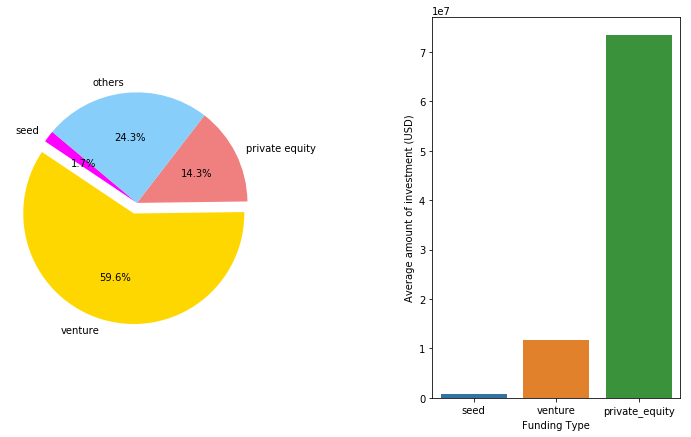

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To find the fraction of investment in each fund type, we will divide the total investment in that fund type by the total investment in all fund types
total_investment_all = master_frame['raised_amount_usd'].sum()
print('Total investment in all fund types %s' % total_investment_all)

# Compute the total investment in seed fund
total_seed = master_frame[master_frame.funding_round_type == 'seed']['raised_amount_usd'].sum()
seed_fraction = total_seed/total_investment_all
print('Fraction of total investment in Seed Fund %s' % seed_fraction)

# Compute the total investment in venture fund
total_venture = master_frame[master_frame.funding_round_type == 'venture']['raised_amount_usd'].sum()
venture_fraction = total_venture/total_investment_all
print('Fraction of total investment in Venture Fund %s' % venture_fraction)

# Compute the total investment in private equity
total_pvt_eq = master_frame[master_frame.funding_round_type == 'private_equity']['raised_amount_usd'].sum()
pvt_eq_fraction = total_pvt_eq/total_investment_all
print('Fraction of total investment in Private Equity Fund %s' % pvt_eq_fraction)

# Compute the total investment in all the remaining fund types
other_funds_fraction = 1 - (seed_fraction + venture_fraction + pvt_eq_fraction)
print('Fraction of total investment in other funds %s' % other_funds_fraction)

# Create the subplots - 1 row, 2 columns
fig1, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.7)
# Adjust the height and width for aesthetics 
fig1.set_figheight(7)
fig1.set_figwidth(12)

# set the labels for the pie chart
labels = ['seed', 'venture', 'private equity', 'others']
# set the pie chart fractions
sizes = [seed_fraction, venture_fraction, pvt_eq_fraction, other_funds_fraction]
# set the pie chart colours
colors = ['magenta', 'gold', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0, 0)
# Plot it on the first subplot
axes[0].pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].axis('equal')

# Next, we will plot the bar chart indicating the average amount of investment of each fund type
# We will group the data by fund types and for each fund type we will find their average investment
grp_means = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
grp_means = grp_means[['seed','venture','private_equity']]
print(grp_means)
# plot the bar chart on the second subplot
ax = sns.barplot(grp_means.index,grp_means.values, ax=axes[1])
# set the x-axis and y-axis labels
ax.set(xlabel = 'Funding Type', ylabel = 'Average amount of investment (USD)')
plt.show()

<b> Plot 2 : A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.</b>

Text(0.5, 1.0, 'Top 9 Countires')

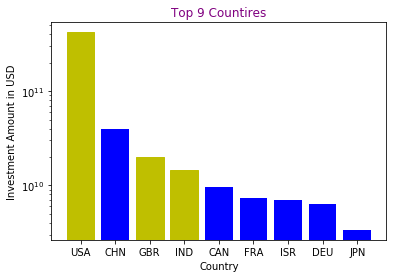

In [53]:
top9_plot=top9.reset_index()
plot_data2=plt.bar(top9_plot['country_code'],top9_plot['raised_amount_usd'], color='blue')

for i in top_3['Alpha-3 code'].tolist():
    plot_data2[top9_plot['country_code'].tolist().index(i)].set_color('y')
plt.yscale('log')
plt.xlabel("Country")
plt.ylabel("Investment Amount in USD")
plt.title("Top 9 Countires",color='purple')

<b> Plot 3 : A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). </b>

Text(0.5, 1.0, 'No. of Investments in top 3 sectors of top 3 countries for Venture FT')

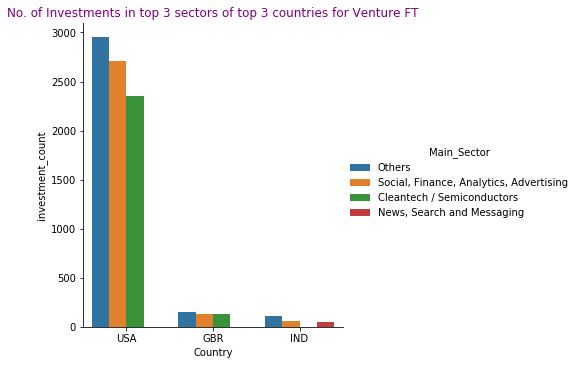

In [54]:
D1_top_sector['Country']=top_3['Alpha-3 code'][0]
D2_top_sector['Country']=top_3['Alpha-3 code'][1]
D3_top_sector['Country']=top_3['Alpha-3 code'][2]

frame=[D1_top_sector,D2_top_sector,D3_top_sector]
plot_data=pd.concat(frame)
plot_data3=plot_data.reset_index()
plot_data3

sns.catplot(x='Country', y='investment_count', hue='Main_Sector', data=plot_data3, kind='bar')
plt.title("No. of Investments in top 3 sectors of top 3 countries for Venture FT",color='purple')